<a href="https://colab.research.google.com/github/praveenbejo95/Hotel-booking-analysis-EDA-/blob/main/Hotel_Booking_Analysis_EDA_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **EDA on Hotel Booking Data**

**The current project is an exploratory data analysis performed on Hotel booking dataset.This is the first project of my Data science journey.Hope you all like it!
So let's begin with the analysis** 

In [2]:
#Importing required libraries

import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Mounting google drive

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
path = '/content/drive/MyDrive/dataset/Hotel Bookings.csv'

In [5]:
#Loading the csv File

df = pd.read_csv(path)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.shape #Looking at the shape of the dataset

(119390, 32)

In [7]:
df.info() #checks the datatupes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
#Let's count how many NaN or Null values we have

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**The columns "agent" and "company" have high numbers of missing values.
As these columns won't be relevant for our analysis,we can drop them**

In [9]:
df=df.drop(['agent','company'],axis=1)

**The columns "children" and "country" have low numbers of missing values.
so let's remove those rows with missing values**

In [10]:
df=df.dropna(axis=0)

In [11]:
df=df.drop(labels='days_in_waiting_list',axis=1) #The column "days_in_waiting_list" is also not relevant in our analysis.so we drop it

In [12]:
#Check to see if there are any more NaN values

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

**Perfect! Now the dataframe  of hotel has no missing values**

In [13]:
df.describe() #Statistical aspect of the dataframe

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,5400.000000,8.000000,5.000000



*  **Since there are only 2 types of Hotel(resort or city),we can simply use a barchart or pie chart to show**.

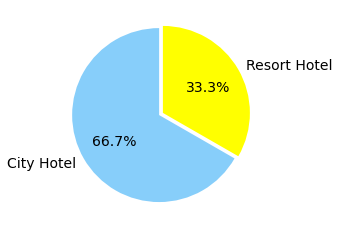

In [14]:
labels = df['hotel'].value_counts().index.tolist() #Indexing labels.tolist() will convert the index to list for each manipulation
sizes = df['hotel'].value_counts().tolist() #Convert value counts to list
explode = (0,0.05) # It determine how much each section is seperated from each other
colors = ['lightskyblue','yellow'] #Determine the color of pie chart

plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',startangle=90,textprops={'fontsize':14})
plt.show()

**We can see by the above pie chart,that majority of people preferred city hotel over resort hotel.**

In [15]:
#Now lets check the cancelled bookings
print('Total Booking canceled')
print(df.is_canceled.value_counts())
print('Cancelation percentage')
print(df.is_canceled.value_counts(normalize=True))

Total Booking canceled
0    74745
1    44153
Name: is_canceled, dtype: int64
Cancelation percentage
0    0.628648
1    0.371352
Name: is_canceled, dtype: float64


**During the year, we have a 37.13% of cancellations.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


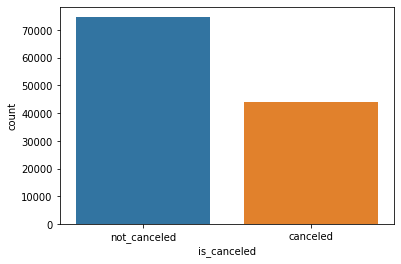

In [16]:
#Now lets plot this result
df['is_canceled'] = df.is_canceled.replace([1,0],['canceled','not_canceled'])
canceled_data = df['is_canceled']
sns.countplot(canceled_data)

**It seems that majority of the bookings were not canceled**

Text(0.5, 1.0, 'Graph showhing cancellation rates in city and resort hotel')

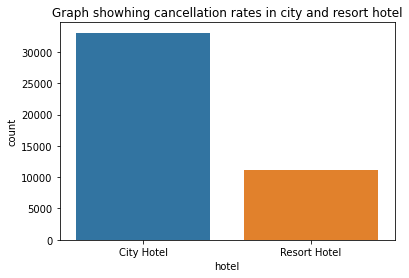

In [17]:
#Let's look into cancellation rate among different types of hotel
lst1 = ['is_canceled','hotel']
type_of_hotel_canceled = df[lst1]
canceled_hotel = type_of_hotel_canceled[type_of_hotel_canceled['is_canceled'] == 'canceled'].groupby(['hotel']).size().reset_index(name = 'count')
sns.barplot(data = canceled_hotel, x = 'hotel',y = 'count').set_title('Graph showhing cancellation rates in city and resort hotel')

**City hotels have the highest cancellation rates,this can be verified by the fact that city hotels have higher booking rate than resort hotels**

## Overview of arrival period

In [18]:
df.arrival_date_year.value_counts(normalize=True)#arrival period in year

2016    0.474651
2017    0.341503
2015    0.183847
Name: arrival_date_year, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


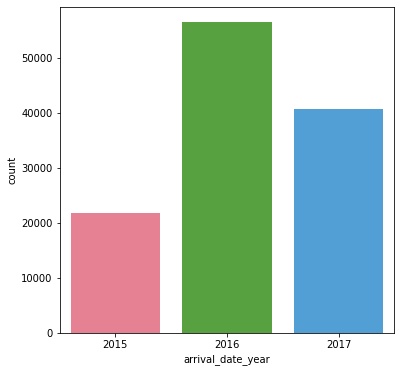

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(df['arrival_date_year'],palette='husl')
plt.show()

**I can see that 2016 seems to be the year where hotel booking is at its highest**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


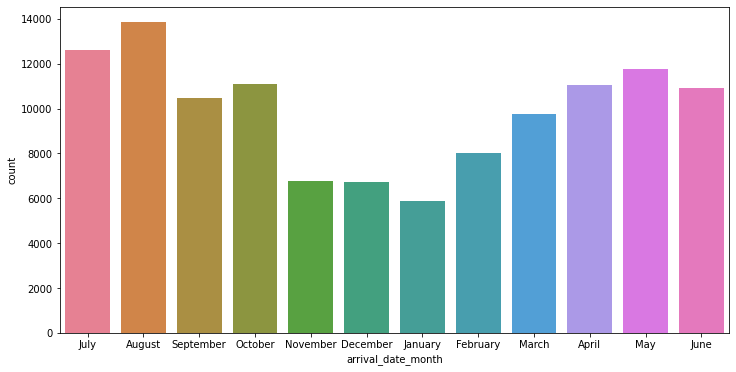

In [20]:
#Arrival period in month
plt.figure(figsize=(12,6))
sns.countplot(df['arrival_date_month'],palette='husl')
plt.show()

**Increasing in booking on august being is highest.summer ends around august,it seems that summer period is a peak period for hotel booking**

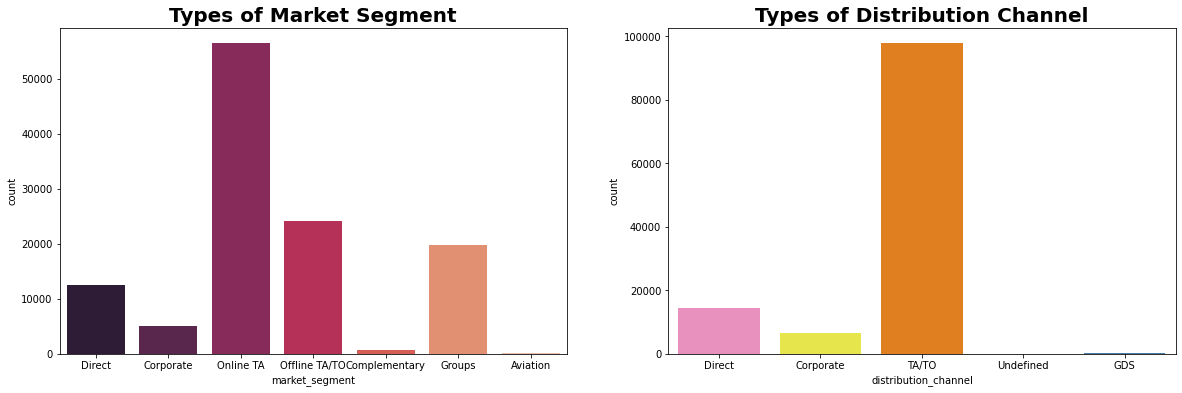

In [21]:
#Lets check the market segment designation
#In categories the term "TA" means "Travel Agents" and "TO" means "Tour Operators"
plt.figure(figsize=(20,6))                                                         
plt.subplot(1,2,1)
sns.countplot(x='market_segment',data=df,palette='rocket')
plt.title('Types of Market Segment',fontweight="bold",size=20)

plt.subplot(1,2,2)
sns.countplot(data=df,x='distribution_channel',palette='Set1_r')
plt.title('Types of Distribution Channel',fontweight="bold",size=20)


plt.show()

**Majority of bookings were made through online travel agent and the travel agents whether online/offline have the highest distribution rates**

# Meal

* **Undefined/SC--->no meal package;**
* **BB--->Bed & Breakfast** 

* **HB--->Halfboard(breakfast and one other meal---usually dinner);**
* **FB--->fullboard(breakfast,lunch and dinner)**





In [22]:
#Types of meak booked
df.meal.value_counts(normalize=True)

BB           0.772620
HB           0.121398
SC           0.089472
Undefined    0.009798
FB           0.006712
Name: meal, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


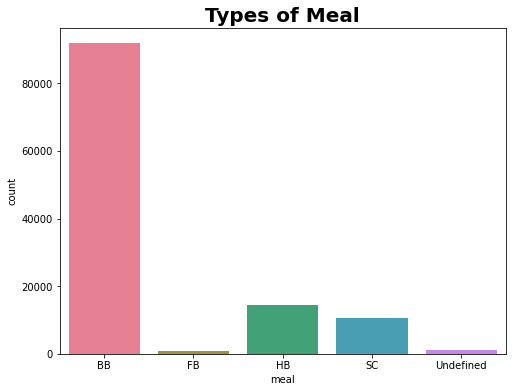

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(df['meal'],palette='husl')
plt.title('Types of Meal',fontweight="bold",size=20)
plt.show()

**The highest percentage is of BB is 77.26%.The BB is most favorite meal for the peoples**

In [24]:
df.reserved_room_type.value_counts(normalize=True)

A    0.719953
D    0.161256
E    0.054643
F    0.024307
G    0.017519
B    0.009369
C    0.007830
H    0.005055
L    0.000050
P    0.000017
Name: reserved_room_type, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


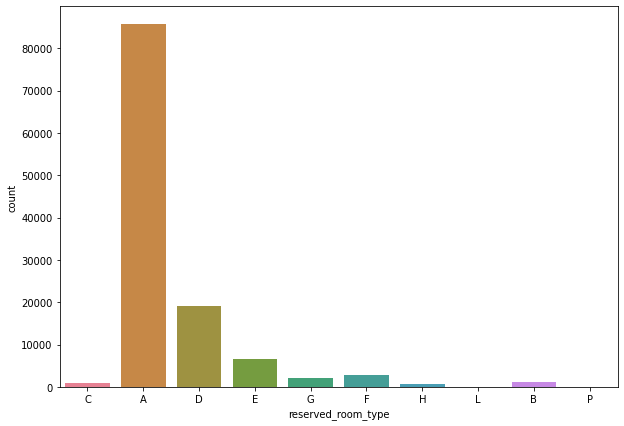

In [25]:
plt.figure(figsize=(10,7))
sns.countplot(df['reserved_room_type'],palette='husl')
plt.show()

**The Type "A" room is reserved by the most the clients,with 71.99% of the reservations.**

## Overview of repeated guests

  Check if the booking name was from a repeated guest(1) or not(0)

In [26]:
df.is_repeated_guest.value_counts(normalize=True)

0    0.967989
1    0.032011
Name: is_repeated_guest, dtype: float64


* **Low number of repeated guests.**
* **A need to target repeated guests since they have booked before.**  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


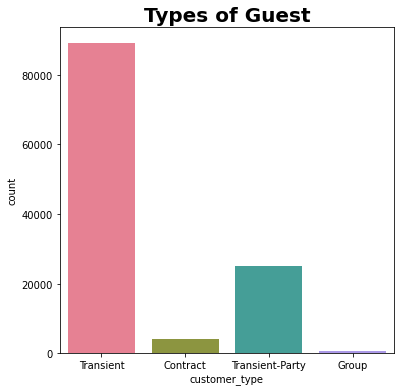

In [27]:
#Looking at types of guests
plt.figure(figsize=(6,6))
sns.countplot(df['customer_type'],palette='husl')
plt.title('Types of Guest',fontweight="bold",size=20)

plt.show()

**Mojority of the booking are transient.This means that the booking is not part of a group or contact.With the ease of booking directly from the website,most people tend to skip the middleman to ensure quick response from their booking.**

In [28]:
#looking into deposit types
df.deposit_type.value_counts(normalize=True)

No Deposit    0.876070
Non Refund    0.122567
Refundable    0.001363
Name: deposit_type, dtype: float64

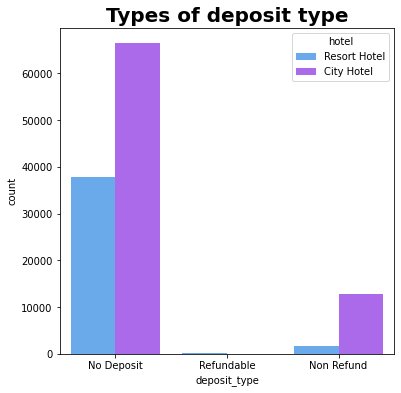

In [29]:
plt.figure(figsize=(6,6))
sns.countplot(data= df,x='deposit_type',hue='hotel',palette='cool')
plt.title('Types of deposit type',fontweight="bold",size=20)
plt.show()

**Majority of the bookings don't have a deposit towards it**

In [30]:
#looking fo car parking spaces
df.required_car_parking_spaces.value_counts(normalize=True)

0    0.938519
1    0.061204
2    0.000235
3    0.000025
8    0.000017
Name: required_car_parking_spaces, dtype: float64

In [31]:
df.required_car_parking_spaces.sum()

7358

**7,358 car parking spaces have been used**

## Reservation status 

* Canceled--->booking was canceled by the customer;
* Check-out--->customer has checked in but already departed;

* No-Show--->customer did not check-in and did inform the hotel of the reason why






In [32]:
df.reservation_status.value_counts(normalize=True)

Check-Out    0.628648
Canceled     0.361234
No-Show      0.010118
Name: reservation_status, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


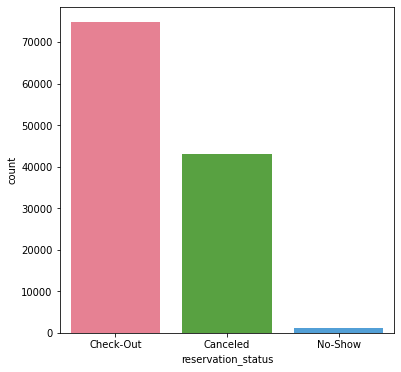

In [33]:
plt.figure(figsize=(6,6))
sns.countplot(df['reservation_status'],palette='husl')
plt.show()

In [34]:
#let's see whether the stay is over weekend or weekday.
df.stays_in_weekend_nights.value_counts(normalize=True)

0     0.434658
2     0.279643
1     0.256741
4     0.015551
3     0.010538
6     0.001287
5     0.000656
8     0.000505
7     0.000160
9     0.000093
10    0.000059
12    0.000042
16    0.000025
13    0.000025
14    0.000017
Name: stays_in_weekend_nights, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


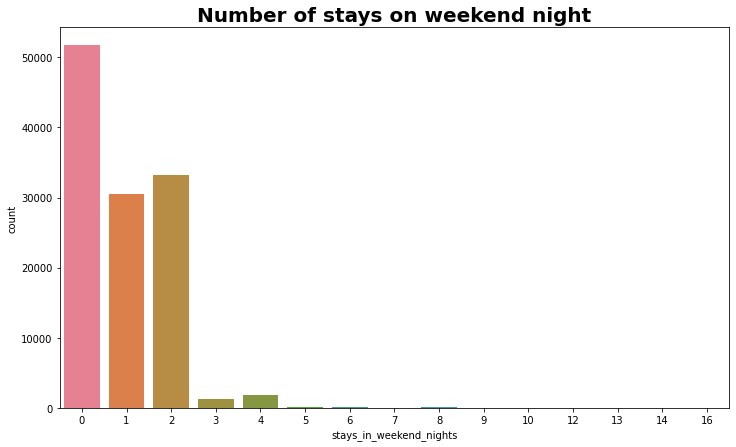

In [35]:
plt.figure(figsize=(12,7))
sns.countplot(df['stays_in_weekend_nights'],palette='husl')
plt.title('Number of stays on weekend night',fontweight="bold",size=20)
plt.show()

In [36]:
df.stays_in_week_nights.value_counts(normalize=True)

2     0.282376
1     0.253082
3     0.186740
5     0.092945
4     0.080355
0     0.063861
6     0.012540
10    0.008663
7     0.008638
8     0.005501
9     0.001943
15    0.000715
11    0.000463
19    0.000370
12    0.000353
20    0.000345
14    0.000294
13    0.000227
16    0.000135
21    0.000126
22    0.000059
18    0.000050
25    0.000050
30    0.000042
17    0.000034
24    0.000025
40    0.000017
26    0.000008
32    0.000008
33    0.000008
34    0.000008
35    0.000008
41    0.000008
Name: stays_in_week_nights, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


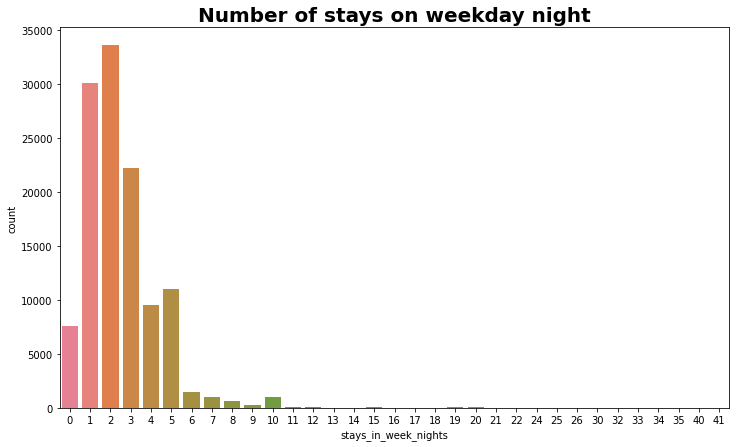

In [37]:
plt.figure(figsize=(12,7))
sns.countplot(df['stays_in_week_nights'],palette='husl')
plt.title('Number of stays on weekday night',fontweight="bold",size=20)
plt.show()

**It seems that majority of the stays are over the weekday's night**

## Types of visitors

In [38]:
df.adults.value_counts(normalize=True)

2     0.752704
1     0.191214
3     0.052120
0     0.003305
4     0.000521
26    0.000042
27    0.000017
20    0.000017
5     0.000017
55    0.000008
50    0.000008
40    0.000008
10    0.000008
6     0.000008
Name: adults, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


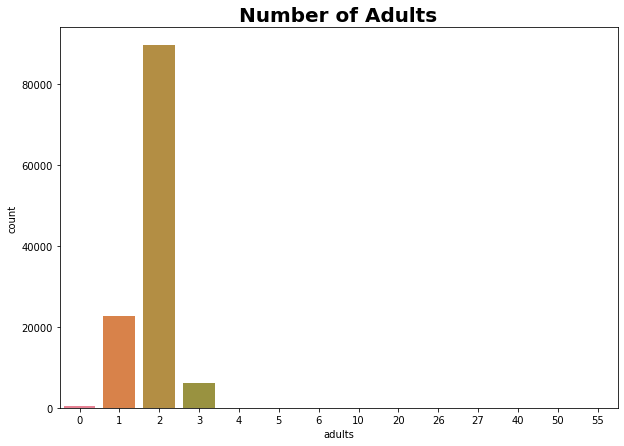

In [39]:
plt.figure(figsize=(10,7))
sns.countplot(df['adults'],palette='husl')
plt.title('Number of Adults',fontweight="bold",size=20)
plt.show()

In [40]:
df.children.value_counts(normalize=True)

0.0     0.927846
1.0     0.040808
2.0     0.030699
3.0     0.000639
10.0    0.000008
Name: children, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


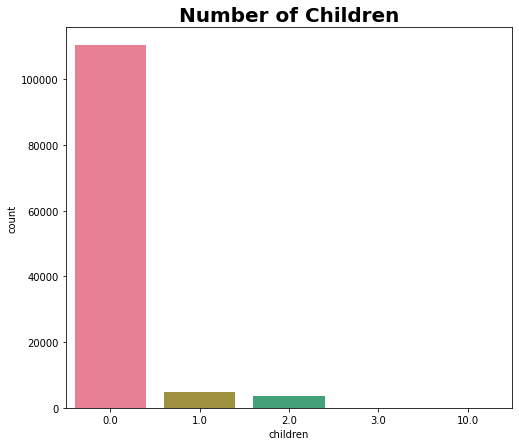

In [41]:
plt.figure(figsize=(8,7))
sns.countplot(df['children'],palette='husl')
plt.title('Number of Children',fontweight="bold",size=20)
plt.show()

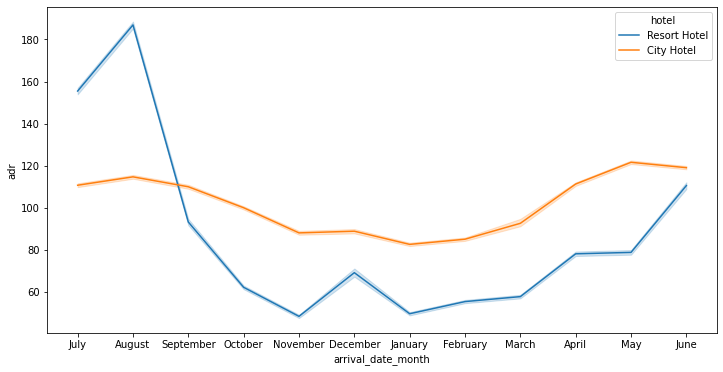

In [42]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month',y='adr',hue='hotel',data=df)
plt.show()


* **For resort hotels,the average daily rate is more expensive during august,july and september.**
* **For city hotels,the average daily rate is more expensive during august,july,june and may.**

## **Asking and Answering Questions**

**Q1:Which month is the most occupied and which is least occupied?**

In [43]:
df.arrival_date_month.value_counts(normalize=True)

August       0.116503
July         0.106209
May          0.099068
October      0.093315
April        0.092895
June         0.091902
September    0.088033
March        0.081911
February     0.067385
November     0.056788
December     0.056586
January      0.049404
Name: arrival_date_month, dtype: float64

**August is the most occupied month with 11.65% bookings and january is the least occupied month with 4.94% bookings.**

**Q2:Which month have cheaper booking rate?**

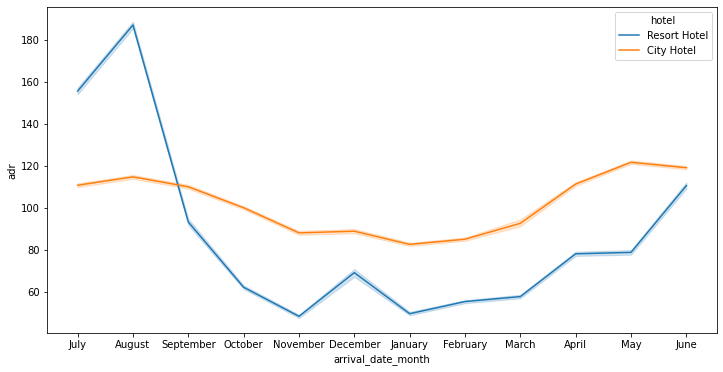

In [44]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month',y='adr',hue='hotel',data=df)
plt.show()

**For both city and resort hotels,November to January have cheaper average daily rates**

**Q3:Which country should be targetted for promotion?**

In [45]:
print("Countries targetted for promotion")
print(df.country.value_counts().head(5))
print('-'*50)
print("Countries not targetted for promotion")
print(df.country.value_counts().tail(5))

Countries targetted for promotion
PRT    48586
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: country, dtype: int64
--------------------------------------------------
Countries not targetted for promotion
VGB    1
NPL    1
SDN    1
DJI    1
ATF    1
Name: country, dtype: int64


**More visitors are from western europe,namely Portugal,France,Great Britain,and Spain being the highest and suit for the promotion.
The countries with only 1 guest are not suitable for promotion,countries like we have Madagascar,Dominicia,Mali,and Guyana,etc.**

**Q4:Numbers of customers repeated their bookings.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


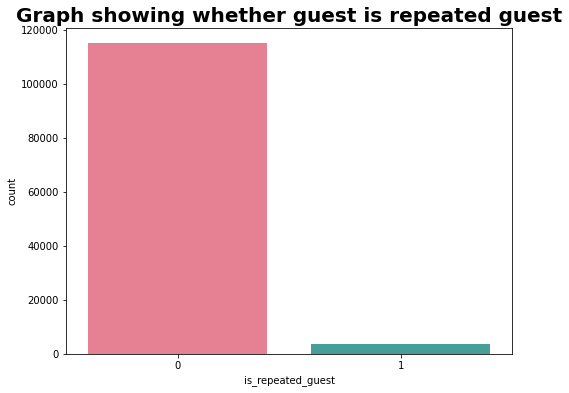

In [51]:
plt.figure(figsize=(8,6))
sns.countplot(df['is_repeated_guest'],palette='husl')
plt.title('Graph showing whether guest is repeated guest',fontweight="bold",size=20)
plt.show()

**Most customers are not repeating their booking.**

**Q5:What is the most common customer type?**

In [47]:
df.customer_type.value_counts(normalize=True)

Transient          0.750004
Transient-Party    0.210920
Contract           0.034281
Group              0.004794
Name: customer_type, dtype: float64

**Transiet are the most common customer type,they represent 75% of the total customers.**

**Q6:How many bookings changes have been done during the studied period?**

In [48]:
df.booking_changes.sum()

26298

**There were 25,829 registered changes in the bookings during this period**

# **Inferences and Conclusion**

* **Majority of the hotels booked are city hotel.**
* **Majority of the guests are from Western Europe.So target this area for more customers.**

* **We should also target months between May to Aug.Those are peak months due to the summer period.**
* **No deposit policies lead to a higher cancellation rates.**

* **Since there are very few repeated guests,focus should be on retaining the customers after their first visit.**
* **The majority of reservations converts into successful transactions.**







### **All done with my first EDA project on 'Hotel booking dataset'.I have done every kind of work that has been required in this project,whatever I learned in python with the help of 'almabetter' and every instructor in almabetter taught us I mentioned it in this project.Hope you all like it,and also i would like to thank 'almabetter' for giving this opportunity to me...**

#                                 **!THANK YOU!**